<a href="https://colab.research.google.com/github/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/blob/main/DA310_Multiple_Linear_Regression_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plan**

Load data

Split dataset into training and test dataset, use training dataset to create the model.

Display sample data and summary


Calculate normality p-value

Calculate lineral regression model and display values

Display regression summary

Display scatterplot again with calculated regression line

Compare actual and predicted values to determine accuracy of the linear regression equation

Observe residuals data in graphical form to draw conclusions


Normality in Mulitiple Linear Regression
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/normality/


In [2]:
#Read this csv file from GitHub into Jupyter Notebook.
dataset = pd.read_csv(r"https://raw.githubusercontent.com/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/main/insurance.csv")

In [3]:
#Mask category values to numeric/binary
dataset['sex'].mask(dataset['sex'] == 'female', 0, inplace=True)
dataset['sex'].mask(dataset['sex'] == 'male', 1, inplace=True)

dataset['smoker'].mask(dataset['smoker'] == 'no', 0, inplace=True)
dataset['smoker'].mask(dataset['smoker'] == 'yes', 1, inplace=True)

dataset['region'].mask(dataset['region'] == 'northeast', 0, inplace=True)
dataset['region'].mask(dataset['region'] == 'southeast', 1, inplace=True)
dataset['region'].mask(dataset['region'] == 'northwest', 2, inplace=True)
dataset['region'].mask(dataset['region'] == 'southwest', 3, inplace=True)

In [4]:
#Make a copy and populate with training data
datasettraining = dataset.copy()
datasettest = dataset.copy()

#Take a random sample of 75% of the data for training (and put them into order and renumber to eliminate missing index values)
datasettraining = datasettraining.sample(frac = .75).sort_index().reset_index(drop=True)

#Get remaining 25% of data rows from dataset (remove all rows from dataset that aren't already in datasettraining)
datasettest = (pd.merge(dataset, datasettraining, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)).sort_index().reset_index(drop=True)

In [5]:
#Check training data head
datasettraining.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,28,1,33.00,3,0,1,4449.4620
2,32,1,28.88,0,0,2,3866.8552
3,31,0,25.74,0,0,1,3756.6216
4,46,0,33.44,1,0,1,8240.5896


In [6]:
#Summary of all fields
datasettraining.describe()

,age,bmi,children,charges
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,39.170319,30.867480,1.087649,13156.588742
std,14.010745,6.147069,1.192485,12040.757962
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.400000,0.000000,4719.683425
50%,39.000000,30.590000,1.000000,9265.987900
75%,51.000000,34.960000,2.000000,16428.094587
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Summary of all fields
datasettest.describe()

,age,bmi,children,charges
count,334.000000,334.000000,334.000000,334.000000
mean,39.317365,30.049925,1.116766,13612.604474
std,14.187754,5.915538,1.245347,12327.769890
min,18.000000,17.195000,0.000000,1137.011000
25%,26.000000,25.908750,0.000000,4755.190250
50%,40.000000,29.750000,1.000000,9868.057525
75%,51.000000,33.915000,2.000000,17846.674437
max,64.000000,49.060000,5.000000,51194.559140


In [8]:
#Set Variable Choices
MultiVarChoices = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

#Create Linear Regression object
model = LinearRegression()

#Fit the dataset
model.fit(datasettraining[MultiVarChoices], datasettraining['charges'])


LinearRegression()

In [9]:
#Gernate list of predictions from test data
predictions = model.predict(datasettest[MultiVarChoices])  

#Check test data head
datasettest.head() 

,age,sex,bmi,children,smoker,region,charges
0,18,1,33.770,1,0,1,1725.55230
1,33,1,22.705,0,0,2,21984.47061
2,37,0,27.740,3,0,2,7281.50560
3,60,0,25.840,0,0,2,28923.13692
4,23,1,34.400,0,0,3,1826.84300


In [10]:
#Sample data output
print('Actual'.ljust(14), 'Predicted'.ljust(14))
print('Charges'.ljust(14), 'Charges'.ljust(14))

for i in [0,1,2,3,4,95,96,97,98,99]:
    print("${:,.2f}".format(datasettest['charges'][i]).ljust(14), "${:,.2f}".format(predictions[i]).ljust(14))

Actual         Predicted     
Charges        Charges       
$1,725.55      $4,001.67     
$21,984.47     $3,549.47     
$7,281.51      $7,695.73     
$28,923.14     $11,237.49    
$1,826.84      $4,508.79     
$12,404.88     $7,843.12     
$13,844.51     $23,731.16    
$12,029.29     $9,790.62     
$1,391.53      $3,848.75     
$27,000.98     $14,105.37    


In [11]:
#Check accuracy of model (Coefficient of Determination)
r_sq = model.score(datasettraining[MultiVarChoices], datasettraining['charges'])
print('Coefficient of Determination:', r_sq)

Coefficient of Determination: 0.7506759939507737


In [12]:
#Get the Y-intercept value
salIntercept = model.intercept_

#Get the Coefficents for the formula.
salCoef = model.coef_

#Output formula variables for regression analysis.
print('Intercept:', salIntercept,'\n')

print("Coefficients:")
list(zip(datasettraining[MultiVarChoices], salCoef))

Intercept: -11111.536494240072 

Coefficients:


[('age', 245.8928383959251),
 ('sex', -77.77837910701348),
 ('bmi', 309.77371342640083),
 ('children', 508.4000543264668),
 ('smoker', 24062.280151626834),
 ('region', -204.54730582324206)]

In [13]:
#qqplot(data, line='s')
#pyplot.show()

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     375.8
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          1.81e-294
Time:                        21:11:25   Log-Likelihood:                -10159.
No. Observations:                1004   AIC:                         2.034e+04
Df Residuals:                     995   BIC:                         2.038e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.123e+04   1130.797     -9.933      

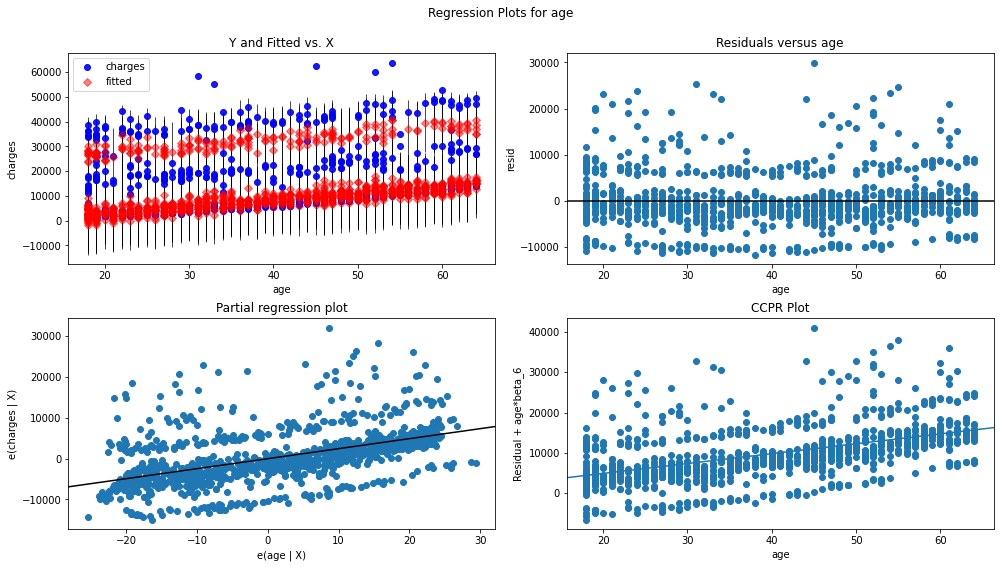

In [14]:
# fit multi linear regression model
multi_model = ols('charges ~ age + sex + bmi + children + smoker + region', data=datasettraining).fit()

# display model summary
print(multi_model.summary())

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(multi_model, 'age', fig=fig)

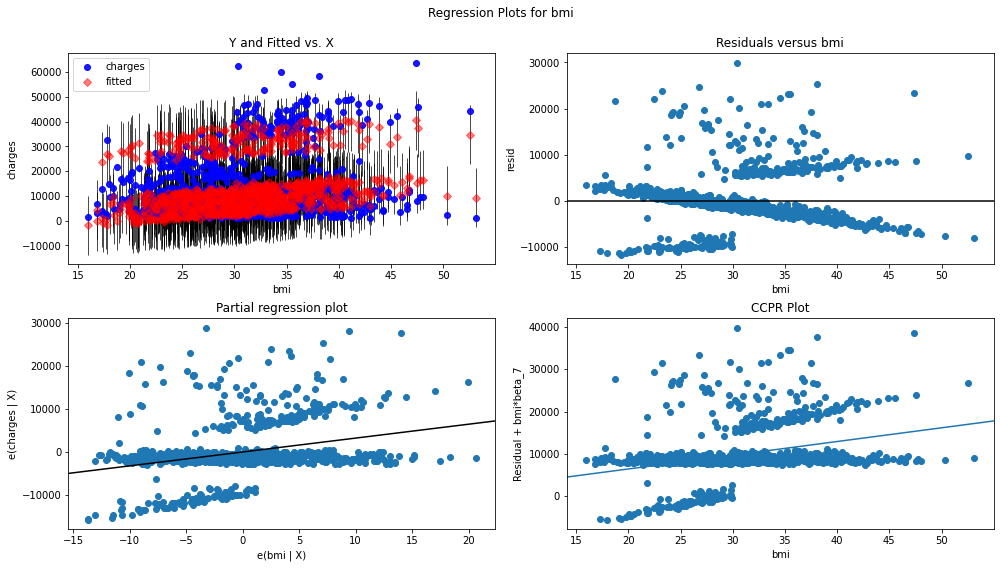

In [15]:
# BMI

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(multi_model, 'bmi', fig=fig)